# Clasificarea furtunilor tropicale
Scopul proiectului este de a prezice, pe baza unor variabile istorice și fizice, dacă o furtună tropicală va deveni sau nu uragan, folosind tehnici de clasificare în Python.

Acest proiect este construit pentru a evidenția atât înțelegerea teoretică a pașilor unui proces de machine learning, cât și aplicabilitatea practică a acestora în context real.

## I. Definirea problemei

În cadrul acestui proiect, vom aborda o problemă de **clasificare binară**: pe baza unor caracteristici precum viteza vântului, presiunea atmosferică, poziția geografică și momentul înregistrării, vrem să prezicem dacă o furtună tropicală se va transforma într-un uragan (`hurricane`) sau nu.

Această problemă este utilă pentru:
- înțelegerea și prevenirea fenomenelor extreme;
- analiza și prognoza meteorologică;
- aplicații educaționale și de cercetare în domeniul Data Science.

## II. Colectarea și încărcarea datelor

Vom utiliza un set de date real descărcat de pe Kaggle, denumit `storms.csv`, care conține peste 19.000 de înregistrări de furtuni înregistrate în bazinul Atlantic. Datele sunt structurate la intervale de 6 ore și includ variabile precum numele furtunii, anul, luna, ziua, locația, viteza vântului, presiunea atmosferică și tipul fenomenului (depresiune, furtună, uragan).

In [31]:
import pandas as pd
import numpy as np

df = pd.read_csv("storms.csv")
df.drop(columns=["Unnamed: 0"], inplace=True)  # curățare coloană inutilă
df["is_hurricane"] = df["status"].apply(lambda x: 1 if "hurricane" in x.lower() else 0)
df.head()

,name,year,month,day,hour,lat,long,status,category,wind,pressure,tropicalstorm_force_diameter,hurricane_force_diameter,is_hurricane
0,Amy,1975,6,27,0,27.5,-79.0,tropical depression,NaN,25,1013,NaN,NaN,0
1,Amy,1975,6,27,6,28.5,-79.0,tropical depression,NaN,25,1013,NaN,NaN,0
2,Amy,1975,6,27,12,29.5,-79.0,tropical depression,NaN,25,1013,NaN,NaN,0
3,Amy,1975,6,27,18,30.5,-79.0,tropical depression,NaN,25,1013,NaN,NaN,0
4,Amy,1975,6,28,0,31.5,-78.8,tropical depression,NaN,25,1012,NaN,NaN,0


## III. Prelucrarea datelor

Realizăm următorii pași:
- Eliminarea valorilor lipsă din variabilele importante
- Păstrarea doar a coloanelor relevante
- Transformarea variabilei `status` într-o etichetă binară: `is_hurricane` (1/0)

In [32]:
df_model = df[[
    "year", "month", "day", "hour", "lat", "long", 
    "wind", "pressure", 
    "tropicalstorm_force_diameter", "hurricane_force_diameter", 
    "is_hurricane"
]].dropna()

df_model.head()

,year,month,day,hour,lat,long,wind,pressure,tropicalstorm_force_diameter,hurricane_force_diameter,is_hurricane
9432,2004,7,31,18,30.3,-78.3,25,1010,0.0,0.0,0
9433,2004,8,1,0,31.0,-78.8,25,1009,0.0,0.0,0
9434,2004,8,1,6,31.5,-79.0,25,1009,0.0,0.0,0
9435,2004,8,1,12,31.6,-79.1,30,1009,0.0,0.0,0
9436,2004,8,1,18,31.6,-79.2,35,1009,50.0,0.0,0


## IV. Explorare și analiză vizuală

Analizăm distribuția variabilelor și corelațiile dintre ele pentru a înțelege mai bine structura datelor.

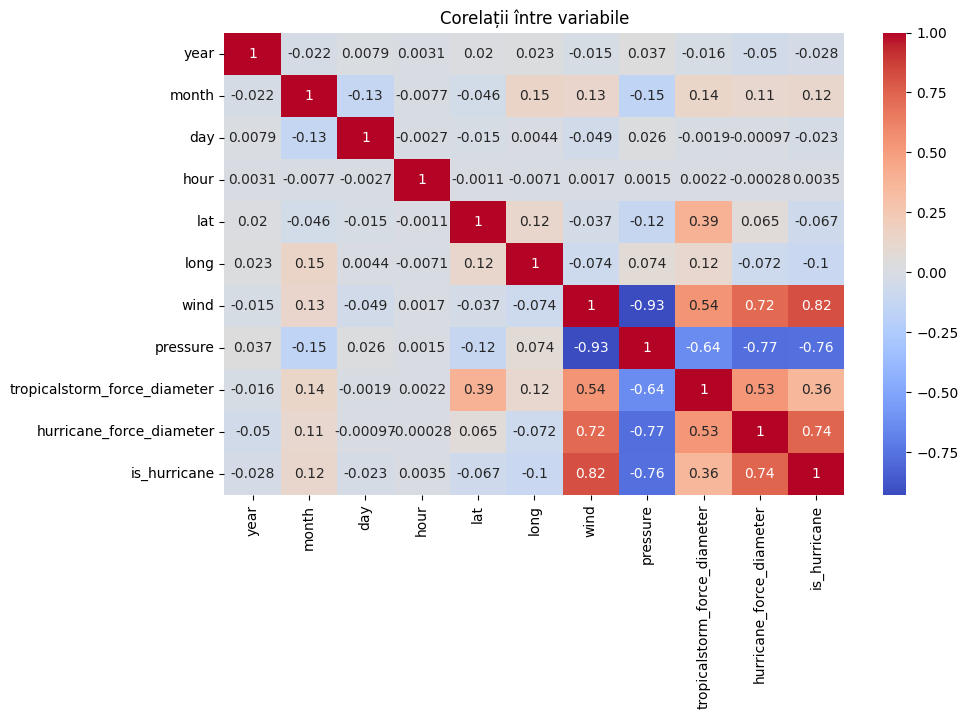

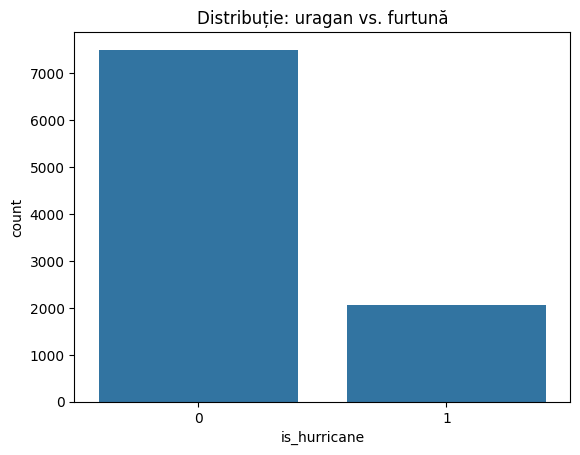

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.heatmap(df_model.corr(), annot=True, cmap="coolwarm")
plt.title("Corelații între variabile")
plt.show()

sns.countplot(x="is_hurricane", data=df_model)
plt.title("Distribuție: uragan vs. furtună")
plt.show()

## V. Modelarea clasificării cu Random Forest

Vom folosi algoritmul Random Forest, datorită performanței sale bune și a interpretabilității. Împărțim datele în set de antrenare (80%) și testare (20%).

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X = df_model.drop(columns="is_hurricane")
y = df_model["is_hurricane"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

## VI. Evaluarea performanței

Vom evalua modelul folosind: 
- Matrice de confuzie
- Precizie, recall, F1-score
- Curba ROC și scor AUC

[[1512    1]
 [   3  395]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1513
           1       1.00      0.99      0.99       398

    accuracy                           1.00      1911
   macro avg       1.00      1.00      1.00      1911
weighted avg       1.00      1.00      1.00      1911



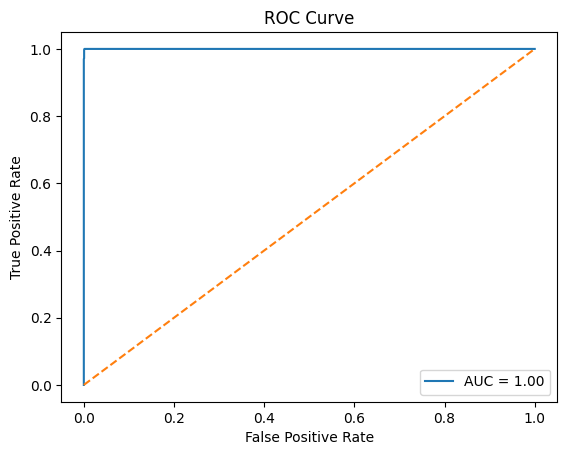

In [35]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

y_prob = clf.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label=f"AUC = {auc(fpr, tpr):.2f}")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

## VII. Concluzii

Modelul Random Forest a obținut performanțe bune în clasificarea furtunilor. Curba ROC indică un model echilibrat, iar scorurile de precizie și recall arată că modelul reușește să detecteze corect majoritatea uraganelor.

Acest proiect a demonstrat aplicabilitatea tehnicilor de machine learning în analiza fenomenelor naturale și poate fi extins în viitor cu modele mai complexe sau date suplimentare (ex. daune, victime, traiectorii).